In [1]:
!pip -q install ./python

tensorflow 1.7.1 has requirement numpy>=1.13.3, but you'll have numpy 1.12.1 which is incompatible.
ipython 6.5.0 has requirement prompt-toolkit<2.0.0,>=1.0.15, but you'll have prompt-toolkit 3.0.8 which is incompatible.


# Collaboration and Competition

---

You are welcome to use this coding environment to train your agent for the project.  Follow the instructions below to get started!

### 1. Start the Environment

Run the next code cell to install a few packages.  This line will take a few minutes to run!

In [2]:
from unityagents import UnityEnvironment
import numpy as np
import random
import torch
import numpy as np
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
env = UnityEnvironment(file_name="/data/Tennis_Linux_NoVis/Tennis")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: TennisBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 8
        Number of stacked Vector Observation: 3
        Vector Action space type: continuous
        Vector Action space size (per agent): 2
        Vector Action descriptions: , 


Environments contain brains which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [4]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State, Action Spaces Instantiate the Enviroment and Agent

Run the code cell below to print some information about the environment.

In [5]:
from MADDPG import MultiAgent


# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents 
num_agents = len(env_info.agents)
print('Number of agents:', num_agents)

# size of each action
action_size = brain.vector_action_space_size
print('Size of each action:', action_size)

# examine the state space 
states = env_info.vector_observations
state_size = states.shape[1]
print('There are {} agents. Each observes a state with length: {}'.format(states.shape[0], state_size))
print('The state for the first agent looks like:', states[0])

agents = MultiAgent(state_size=state_size, action_size=action_size, num_agents=num_agents)

Number of agents: 2
Size of each action: 2
There are 2 agents. Each observes a state with length: 24
The state for the first agent looks like: [ 0.          0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.          0.
  0.          0.         -6.65278625 -1.5        -0.          0.
  6.83172083  6.         -0.          0.        ]


### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  A few **important notes**:
- When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```
- To structure your work, you're welcome to work directly in this Jupyter notebook, or you might like to start over with a new file!  You can see the list of files in the workspace by clicking on **_Jupyter_** in the top left corner of the notebook.
- In this coding environment, you will not be able to watch the agents while they are training.  However, **_after training the agents_**, you can download the saved model weights to watch the agents on your own machine!

Episode 100	Average Score: 0.00	Score: 0.00
Episode 200	Average Score: 0.00	Score: 0.00
Episode 300	Average Score: 0.01	Score: 0.09
Episode 400	Average Score: 0.01	Score: 0.00
Episode 500	Average Score: 0.01	Score: 0.00
Episode 600	Average Score: 0.01	Score: 0.00
Episode 700	Average Score: 0.01	Score: 0.00
Episode 800	Average Score: 0.01	Score: 0.00
Episode 900	Average Score: 0.03	Score: 0.10
Episode 1000	Average Score: 0.07	Score: 0.10
Episode 1100	Average Score: 0.13	Score: 0.10
Episode 1200	Average Score: 0.11	Score: 0.30
Episode 1300	Average Score: 0.32	Score: 0.90
Episode 1400	Average Score: 0.31	Score: 0.00
Episode 1500	Average Score: 0.42	Score: 0.00
Episode 1600	Average Score: 0.44	Score: 0.09
Episode 1617	Average Score: 0.50	Score: 1.80

Environment solved in 1617 episodes!	Average Score: 0.50

Saving Model. Continue training to achieve higher score
Episode 1700	Average Score: 0.43	Score: 0.30
Episode 1800	Average Score: 0.44	Score: 0.00
Episode 1900	Average Score: 0.59	Score:

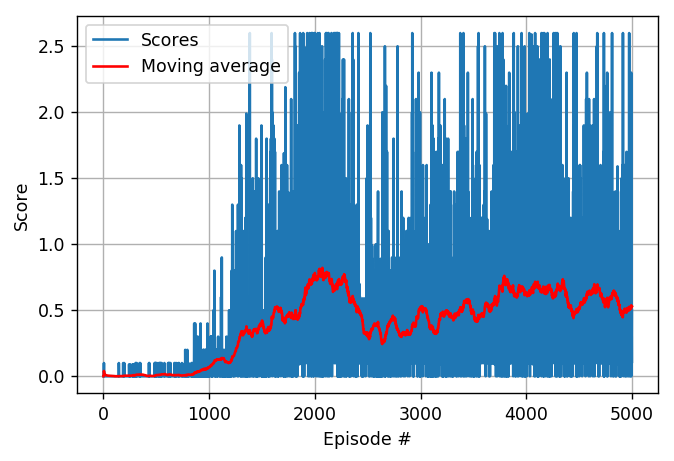

In [6]:
def Maddpg(n_episodes=5000):
    score_solved = 0.5
    scores_deque = deque(maxlen=100)
    scores = []
    moving_average = []
    starting_random = n_episodes / 1   # 10% of total episodes used for random episode and random sampling
    for i_episode in range(1, n_episodes +1):
        env_info = env.reset(train_mode=True)[brain_name]     # reset the environment    
        states = env_info.vector_observations   
        agents.reset()
        score = np.zeros(num_agents)
        while True:
            '''
            if i_episode < starting_random:
                actions = np.random.randn(num_agents, action_size) # select an action (for each agent)
                actions = np.clip(actions, -1, 1)                  # all actions between -1 and 1
            else:
                actions = agents.act(states)
            '''
            actions = agents.act(states)
            env_info = env.step(actions)[brain_name]           # send all actions to tne environment
            next_states = env_info.vector_observations         # get next state (for each agent)
            rewards = env_info.rewards                         # get reward (for each agent)
            dones = env_info.local_done                        # see if episode finished
            score += env_info.rewards                         # update the score (for each agent)

            agents.step(states, actions, rewards, next_states, dones)
            
            states = next_states
             #needs to be checked in multi case
            if np.any(dones):
                break

        max_score = np.max(score)
        scores_deque.append(max_score)
        scores.append(max_score)
        average_score = np.mean(scores_deque)
        moving_average.append(average_score)
        print('\rEpisode {}\tAverage Score: {:.2f}\tScore: {:.2f}'.format(i_episode, average_score, max_score), end="")
        if(i_episode % 100 == 0):
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, average_score))
        if average_score >= score_solved:
            agents.save_model()
            print('\rEpisode {}\tAverage Score: {:.2f}'.format(i_episode, np.mean(scores_deque)))
            if(score_solved <= 0.5):
                print('\nEnvironment solved in {:d} episodes!\tAverage Score: {:.2f}'.format(i_episode, average_score))
            print('\nSaving Model. Continue training to achieve higher score')
            score_solved += 0.1;
    return scores, moving_average

scores, m_avg = Maddpg()
 
fig = plt.figure(dpi=125)
ax = fig.add_subplot(111)
plt.plot(np.arange(1, len(scores)+1), scores, label = 'Scores')
plt.plot(np.arange(1, len(m_avg)+1), m_avg, c = 'r', label = 'Moving average')
plt.ylabel('Score')
plt.xlabel('Episode #')
plt.legend(loc = 'upper left')
plt.grid()
plt.show()

When finished, you can close the environment.

In [ ]:
env.close()